In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#blas gemm launch failed
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

In [2]:
feature=['lag1_mean_2']
dataset=pd.read_csv('mental-state.csv',usecols=feature)
df=dataset.head(60)
df

,lag1_mean_2
0,-92.769629
1,417.203910
2,72.231301
3,16.220094
4,27.540246
5,-139.661789
6,-19.426774
7,34.236922
8,-62.398910
9,100.820516


In [3]:
df.shape

(60, 1)

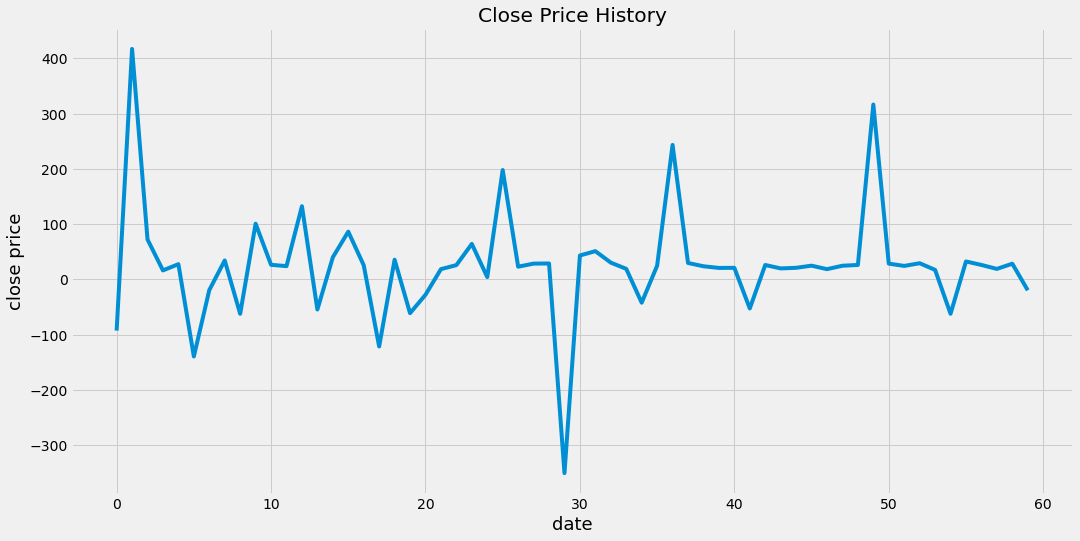

In [4]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['lag1_mean_2'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.show()

In [5]:
data = df.filter(['lag1_mean_2'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .75)

training_data_len

45

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.33596012],
       [1.        ],
       [0.55080891],
       [0.47787635],
       [0.4926164 ],
       [0.27490153],
       [0.43146033],
       [0.50133618],
       [0.37550603],
       [0.58803511],
       [0.49103679],
       [0.48796955],
       [0.62924008],
       [0.38564893],
       [0.50885145],
       [0.5691828 ],
       [0.49001355],
       [0.29853519],
       [0.50315166],
       [0.37704583],
       [0.42039907],
       [0.48083675],
       [0.49035381],
       [0.54034314],
       [0.46213795],
       [0.71452345],
       [0.48664333],
       [0.49389042],
       [0.49420087],
       [0.        ],
       [0.51305862],
       [0.52328101],
       [0.49621999],
       [0.48151483],
       [0.40177727],
       [0.48888603],
       [0.77370196],
       [0.49540788],
       [0.48763676],
       [0.48369287],
       [0.48395612],
       [0.38809773],
       [0.490627  ],
       [0.48256034],
       [0.48400084],
       [0.48902262],
       [0.48081936],
       [0.488

In [7]:
train_data = scaled_data[0:training_data_len,:]
#Splitting the data
x_train=[]
y_train = []
for i in range(5, len(train_data)):
    x_train.append(train_data[i-5:i,0])
    y_train.append(train_data[i,0])

In [8]:
x_train, y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(40, 5, 1)

In [9]:
#initialize RNN
model=keras.Sequential()

model.add(keras.layers.LSTM(units=800,return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(keras.layers.LSTM(units=800,return_sequences=False))
model.add(keras.layers.Dense(400))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.01))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [26]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Train on 40 samples
Epoch 1/5
40/40 [==============================] - 4s 110ms/sample - loss: 0.1885
Epoch 2/5
40/40 [==============================] - 4s 102ms/sample - loss: 0.0638s - loss: 
Epoch 3/5
40/40 [==============================] - 4s 101ms/sample - loss: 0.0705s -
Epoch 4/5
40/40 [==============================] - 4s 102ms/sample - loss: 0.0441
Epoch 5/5
40/40 [==============================] - 4s 101ms/sample - loss: 0.0413


In [27]:
test_data = scaled_data[training_data_len - 5:, :]
x_test=[]
y_test= dataset[training_data_len:,:]
for i in range(5, len(test_data)):
    x_test.append(test_data[i-5:i,0])

In [28]:
x_test=np.array(x_test)

In [29]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(15, 5, 1)

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [31]:
x_test

array([[[0.48395612],
        [0.38809773],
        [0.490627  ],
        [0.48256034],
        [0.48400084]],

       [[0.38809773],
        [0.490627  ],
        [0.48256034],
        [0.48400084],
        [0.48902262]],

       [[0.490627  ],
        [0.48256034],
        [0.48400084],
        [0.48902262],
        [0.48081936]],

       [[0.48256034],
        [0.48400084],
        [0.48902262],
        [0.48081936],
        [0.48887609]],

       [[0.48400084],
        [0.48902262],
        [0.48081936],
        [0.48887609],
        [0.49071146]],

       [[0.48902262],
        [0.48081936],
        [0.48887609],
        [0.49071146],
        [0.86893203]],

       [[0.48081936],
        [0.48887609],
        [0.49071146],
        [0.86893203],
        [0.49382092]],

       [[0.48887609],
        [0.49071146],
        [0.86893203],
        [0.49382092],
        [0.48845143]],

       [[0.49071146],
        [0.86893203],
        [0.49382092],
        [0.48845143],
        [0.49479

In [32]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

27.98662454706828

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


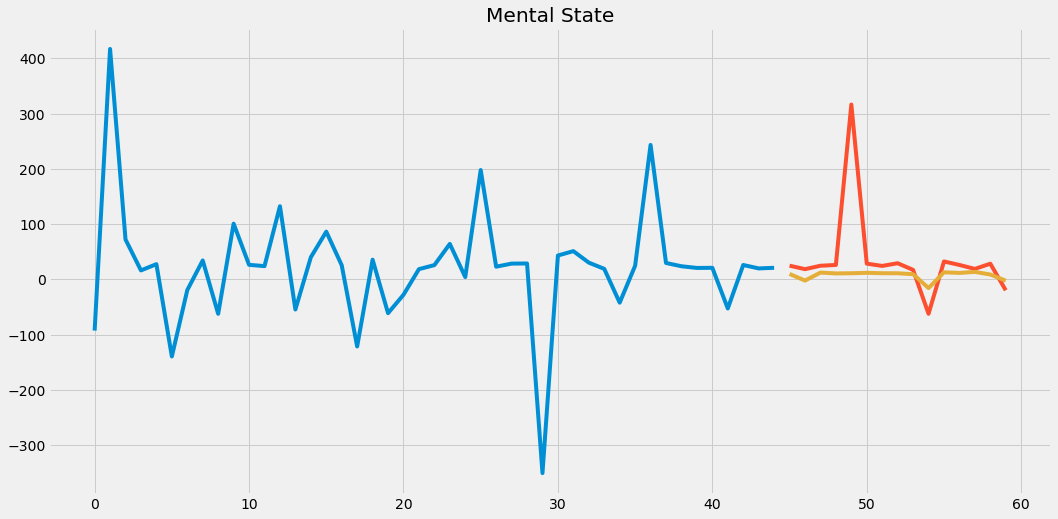

In [33]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Mental State')
plt.plot(train['lag1_mean_2'])
plt.plot(valid[['lag1_mean_2','Predictions']])
plt.show()

In [49]:
accuracy = tf.reduce_mean(tf.cast(predictions, tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(accuracy, feed_dict = predictions) * 100

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [50]:
accuracy

<tf.Tensor 'Mean_6:0' shape=() dtype=float32>